In [1]:
import os
os.getcwd()
os.chdir('/home/siyuan/Seafile/Thesis/PycharmProjects/DD_PE_paper/')

In [2]:
from qiskit.transpiler import PassManager, InstructionDurations
from src.tools.DD_insertion import construct_bv_circuit, \
                                 construct_graph_matrix, \
                                 convert_count_to_prob, \
                                 translate_circuit_to_basis
from qiskit.circuit.library import QFT, GraphState

In [3]:
from qiskit import IBMQ, transpile, Aer
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-france', group='univ-montpellier', project='default')
backend = provider.get_backend('ibmq_toronto')

In [4]:
bv_circuits = []
hs_circuits = []
qft_circuits = []
for i in range(3, 15):
    bv_circuits.append(construct_bv_circuit(i))

# for i in range(2, 15, 2):
#     hs_circuits.append(construct_hs_circuit(i))

for i in range(3, 15):
    qft_circuits.append(QFT(i))

for circuit in bv_circuits:
    circuit.measure_all()

# for circuit in hs_circuits:
#     circuit.measure_all()

for circuit in qft_circuits:
    circuit.measure_all()

In [5]:
durations = InstructionDurations.from_backend(backend)
## add duration of y gates which are used for DD sequences
bconf = backend.configuration()
for i in range(bconf.num_qubits):
    x_duration = durations.get('x', i)
    durations.update(InstructionDurations(
        [('y', i, x_duration)]
        ))

    durations.update(InstructionDurations(
        [('rx', i, x_duration)]
        ))

    durations.update(InstructionDurations(
        [('ry', i, x_duration)]
        ))

In [6]:
graph_state_circuits = []
coupling_map = backend.configuration().coupling_map

for i in range(3, 15):
    gs_circuit_matrix = construct_graph_matrix(i, coupling_map)
    graph_state_circuits.append(GraphState(gs_circuit_matrix))

for circuit in graph_state_circuits:
    circuit.measure_all()

In [7]:
from src.tools.DD_insertion import pm_DD_sequences
pms = pm_DD_sequences(durations)

In [8]:
bv_job_ids = []
bv_jobs = []

for circuit in bv_circuits:
    circuit_list = []
    transpiled_qc = transpile(circuit, backend=backend, optimization_level=3, seed_transpiler=1)
    circuit_list.append(transpiled_qc)
    for pm in pms:
        qc_transpile = pm.run(transpiled_qc)
        qc_transpile_base = translate_circuit_to_basis(qc_transpile, bconf)
        circuit_list.append(qc_transpile_base)
    job = backend.run(circuit_list, shots=8192)
    bv_jobs.append(job)
    job_id = job.job_id()
    print(job_id)
    bv_job_ids.append(job_id)

if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: False
6295d6cb4ad6558e869e4aaa
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: False
6295d6d89baeab33384acd7a
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d6da3bb4afcd82b9550e
if applied DD for None: False
if applied DD fo

In [9]:
for job_id in bv_job_ids:
    print(job_id)

6295d6cb4ad6558e869e4aaa
6295d6d89baeab33384acd7a
6295d6da3bb4afcd82b9550e
6295d6dd0212fffb86251f20
6295d6e09baeaba2e84acd7c
6295d6e3f33cdb23922e06a5
6295d6ee1ea57f4bd7ebd626
6295d6fe3bb4afc3dcb9550f
6295d7014ad655645f9e4aac
6295d70ef33cdb36ec2e06a8
6295d71916cdc4490ef25e4b
6295d71df33cdb20122e06aa


In [8]:
from qiskit import execute

shots = 8192
psts = []
bv_job_ids = [
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',

]
for i, circuit in enumerate(bv_circuits):
    ideal_counts = execute(circuit, backend=Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts()
    ideal_result = list(ideal_counts.keys())[0]
    result_counts = backend.retrieve_job(bv_job_ids[i]).result().get_counts()
    pst = []
    for result_count in result_counts:
        obtain_results = result_count.get(ideal_result, 0)
        pst.append(obtain_results/shots)
    psts.append(pst)

bv_circuit_names = ['BV3', 'BV4', 'BV5', 'BV6', 'BV7', 'BV8', 'BV9', 'BV10', 'BV11', 'BV12', 'BV13', 'BV14']
DD_sequences = ['no_dd', 'hahn_X', 'hahn_Y', 'CP', 'CPMG', 'xy4', 'xy8', 'xy16', 'udd1', 'udd2', 'kdd']
bv_results_data = {}

for i, name in enumerate(bv_circuit_names):
    print(f'---------Result of circuit {name} -------------')
    for j, pst in enumerate(psts[i]):
        print(f'pst result of {DD_sequences[j]}: {pst}')
    bv_results_data[name] = psts[i]

---------Result of circuit BV3 -------------
pst result of no_dd: 0.4632568359375
pst result of hahn_X: 0.4599609375
pst result of hahn_Y: 0.4666748046875
pst result of CP: 0.4715576171875
pst result of CPMG: 0.4537353515625
pst result of xy4: 0.4581298828125
pst result of xy8: 0.454833984375
pst result of xy16: 0.461181640625
pst result of udd1: 0.4666748046875
pst result of udd2: 0.481689453125
pst result of kdd: 0.4654541015625
---------Result of circuit BV4 -------------
pst result of no_dd: 0.46923828125
pst result of hahn_X: 0.4671630859375
pst result of hahn_Y: 0.4632568359375
pst result of CP: 0.4537353515625
pst result of CPMG: 0.43212890625
pst result of xy4: 0.416748046875
pst result of xy8: 0.4273681640625
pst result of xy16: 0.4287109375
pst result of udd1: 0.439697265625
pst result of udd2: 0.4072265625
pst result of kdd: 0.46484375
---------Result of circuit BV5 -------------
pst result of no_dd: 0.1993408203125
pst result of hahn_X: 0.1983642578125
pst result of hahn_Y:

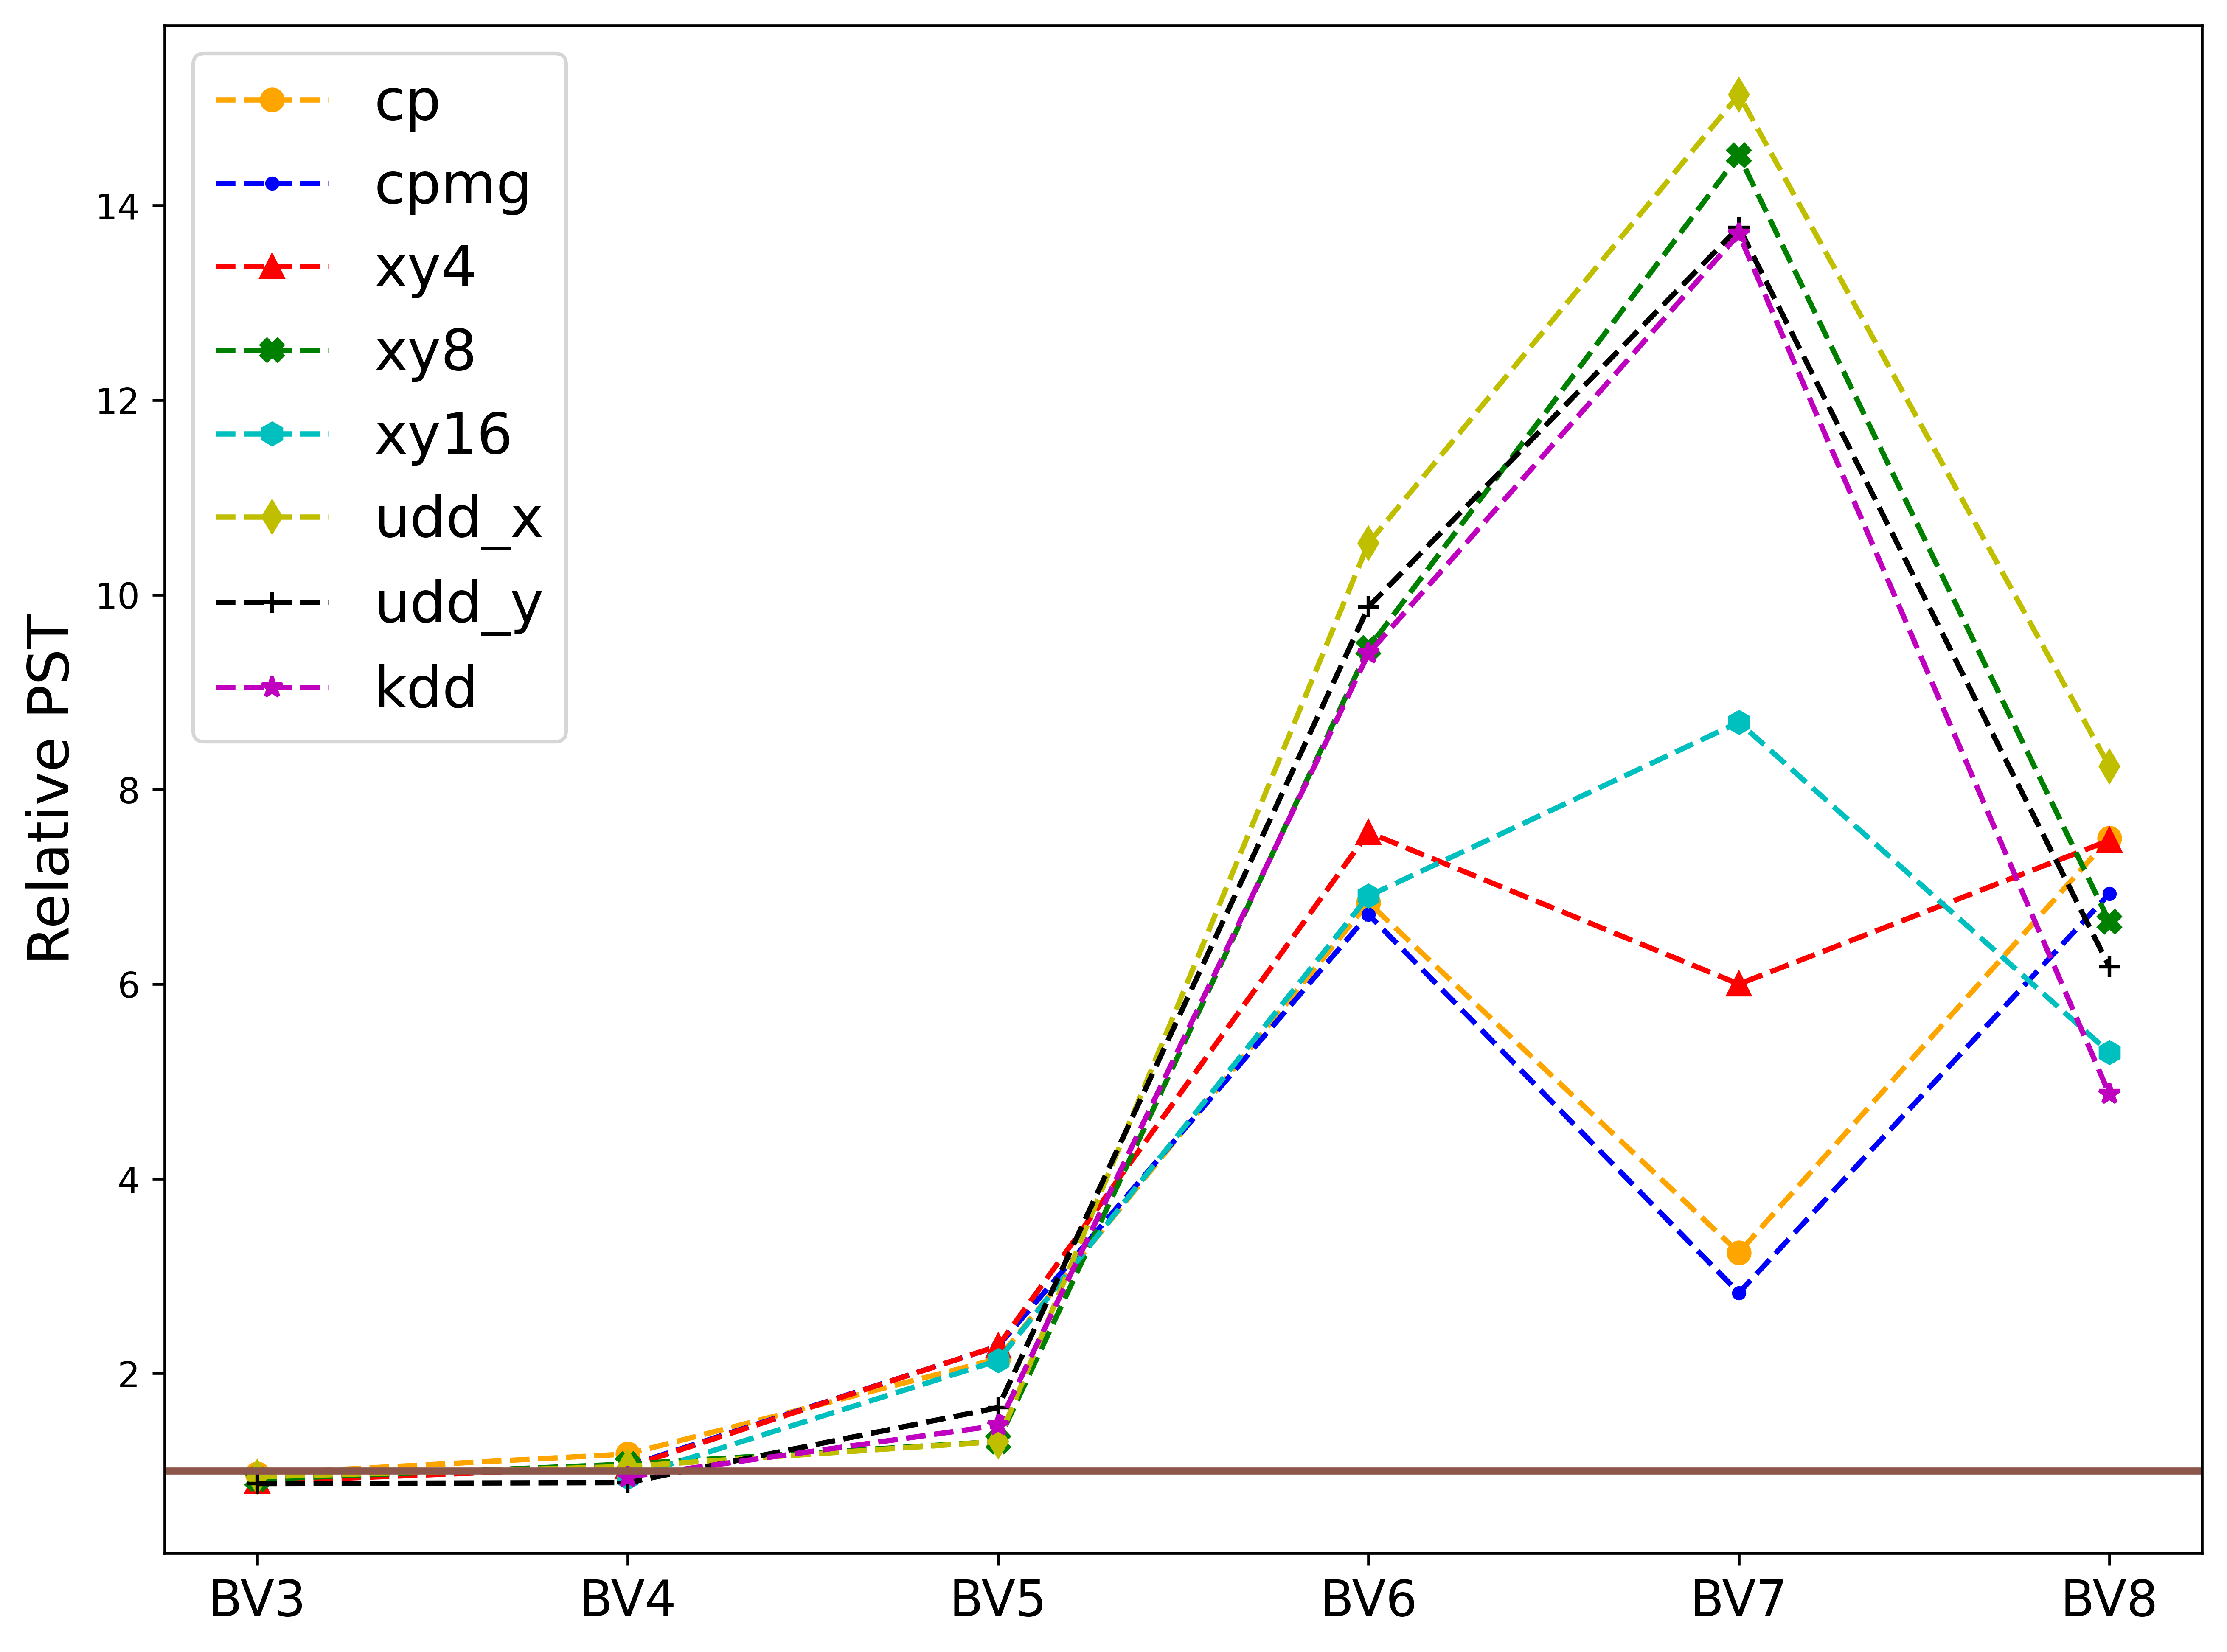

In [9]:
import numpy as np
import matplotlib.pyplot as plt

baseline = []
data = []
for name in bv_circuit_names:
    result_data = bv_results_data[name]
    baseline.append(result_data[0])
    ratio = [i / result_data[0] for i in result_data[1:]]
    data.append(ratio)

data = np.array(data)

# hahn_X = data[:, 0]
# hahn_Y = data[:, 1]
cp = data[1:, 2]
cpmg = data[1:, 3]
xy4 = data[1:, 4]
xy8 = data[1:, 5]
xy16 = list(data[2:, 6])
xy16.insert(0, None)
udd_X = data[1:, 7]
udd_Y = data[1:, 8]
kdd = list(data[2:, 9])
kdd.insert(0, None)

circuit_names = ['BV3', 'BV4', 'BV5', 'BV6', 'BV7', 'BV8', 'BV9', 'BV10', 'BV11', 'BV12', ]

x_ticks = circuit_names[:6]
X = np.arange(len(x_ticks))

from matplotlib.pyplot import figure

fig = figure(num=None, figsize=(8, 6), dpi=600, facecolor='w', edgecolor='k')
ax = fig.add_axes([0, 0, 1, 1])

# plt.plot(X, hahn_Y, linestyle='--', marker='o', color='g', label='hahn_X')
# plt.plot(X, hahn_X, linestyle='--', marker='s', color='m', label='hahn_Y')
plt.plot(X, cp[:-2][:6], linestyle='--', marker='o', color='orange', label='cp')
plt.plot(X, cpmg[:-2][:6], linestyle='--', marker='.', color='b', label='cpmg')
plt.plot(X, xy4[:-2][:6], linestyle='--', marker='^', color='r', label='xy4')
plt.plot(X, xy8[:-2][:6], linestyle='--', marker='X', color='g', label='xy8')
plt.plot(X, xy16[:-2][:6], linestyle='--', marker='h', color='c', label='xy16')
plt.plot(X, udd_X[:-2][:6], linestyle='--', marker='d', color='y', label='udd_x')
plt.plot(X, udd_Y[:-2][:6], linestyle='--', marker='+', color='k', label='udd_y')
plt.plot(X, kdd[:-2][:6], linestyle='--', marker='*', color='m', label='kdd')

plt.axhline(1, color='tab:brown', lw=2)

plt.legend(loc='best', fontsize=16)
# ax.set_title('Relative PST result for BV circuit on ibmq_guadalupe', fontsize=18)
ax.set_xticks(X)
ax.set_xticklabels(x_ticks, fontsize=14)
ax.set_ylabel('Relative PST', fontsize=16)
plt.savefig('TQE_Relat_PST_BV_toronto_0530.pdf', bbox_inches='tight', pad_inches=0)

In [ ]:
data

In [10]:
gs_job_ids = []
gs_jobs = []

for circuit in graph_state_circuits:
    circuit_list = []
    transpiled_qc = transpile(circuit, backend=backend, optimization_level=3, seed_transpiler=1)
    circuit_list.append(transpiled_qc)
    for pm in pms:
        qc_transpile = pm.run(transpiled_qc)
        qc_transpile_base = translate_circuit_to_basis(qc_transpile, bconf)
        circuit_list.append(qc_transpile_base)
    job = backend.run(circuit_list, shots=8192)
    gs_jobs.append(job)
    job_id = job.job_id()
    print(job_id)
    gs_job_ids.append(job_id)

if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d71f1ea57f3e92ebd628
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d72016cdc49eecf25e4c
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d7224bb9754326efb4d3
if applied DD for None: False
if applied DD for N

In [11]:
for job_id in gs_job_ids:
    print(job_id)

6295d71f1ea57f3e92ebd628
6295d72016cdc49eecf25e4c
6295d7224bb9754326efb4d3
6295d7241ea57f8d42ebd629
6295d72516cdc45eeff25e4d
6295d72732e176b25993c9e7
6295d7290212ffdd89251f22
6295d72b16cdc42e10f25e4e
6295d72d32e17659b793c9e8
6295d72ff33cdb5a182e06ab
6295d7314ad65585a59e4aae
6295d7339baeab77344acd7e


In [10]:
from scipy.spatial.distance import jensenshannon
from qiskit import execute
gs_jsds = []

gs_job_ids = [
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
]


shots = 8192

for i, circuit in enumerate(graph_state_circuits):
    ideal_counts = execute(circuit, backend=Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts()
    result_counts = backend.retrieve_job(gs_job_ids[i]).result().get_counts()
    jsd = []
    for result_count in result_counts:
        p_ideal, p_result = convert_count_to_prob(result_count, ideal_counts, shots=shots)
        jsd.append(jensenshannon(p_ideal, p_result))
    gs_jsds.append(jsd)

circuit_names = ['GS3', 'GS4', 'GS5', 'GS6', 'GS7', 'GS8', 'GS9', 'GS10', 'GS11', 'GS12', 'GS13', 'GS14']
DD_sequences = ['no_dd', 'hahn_X', 'hahn_Y', 'CP', 'CPMG', 'xy4', 'xy8', 'xy16', 'udd1', 'udd2', 'kdd']

gs_results_data = {}

for i, name in enumerate(circuit_names):
    print(f'---------Result of circuit {name} -------------')
    for j, jsd in enumerate(gs_jsds[i]):
        print(f'jsd result of {DD_sequences[j]}: {jsd}')
    gs_results_data[name] = gs_jsds[i]

---------Result of circuit GS3 -------------
jsd result of no_dd: 0.031430189998755693
jsd result of hahn_X: 0.03188082901100161
jsd result of hahn_Y: 0.023273050852650363
jsd result of CP: 0.0548988615547245
jsd result of CPMG: 0.03464263787323621
jsd result of xy4: 0.06948733896906059
jsd result of xy8: 0.05733514257645367
jsd result of xy16: 0.03603692132289396
jsd result of udd1: 0.12081051718120957
jsd result of udd2: 0.04250349365667509
jsd result of kdd: 0.03372001077669006
---------Result of circuit GS4 -------------
jsd result of no_dd: 0.03650522497981503
jsd result of hahn_X: 0.03139487551082121
jsd result of hahn_Y: 0.031976432316599745
jsd result of CP: 0.0321834078936386
jsd result of CPMG: 0.0356328260930618
jsd result of xy4: 0.04781957226213084
jsd result of xy8: 0.06908428942974612
jsd result of xy16: 0.03447768986943665
jsd result of udd1: 0.043617474563695406
jsd result of udd2: 0.03903316166600895
jsd result of kdd: 0.030462145804372624
---------Result of circuit G

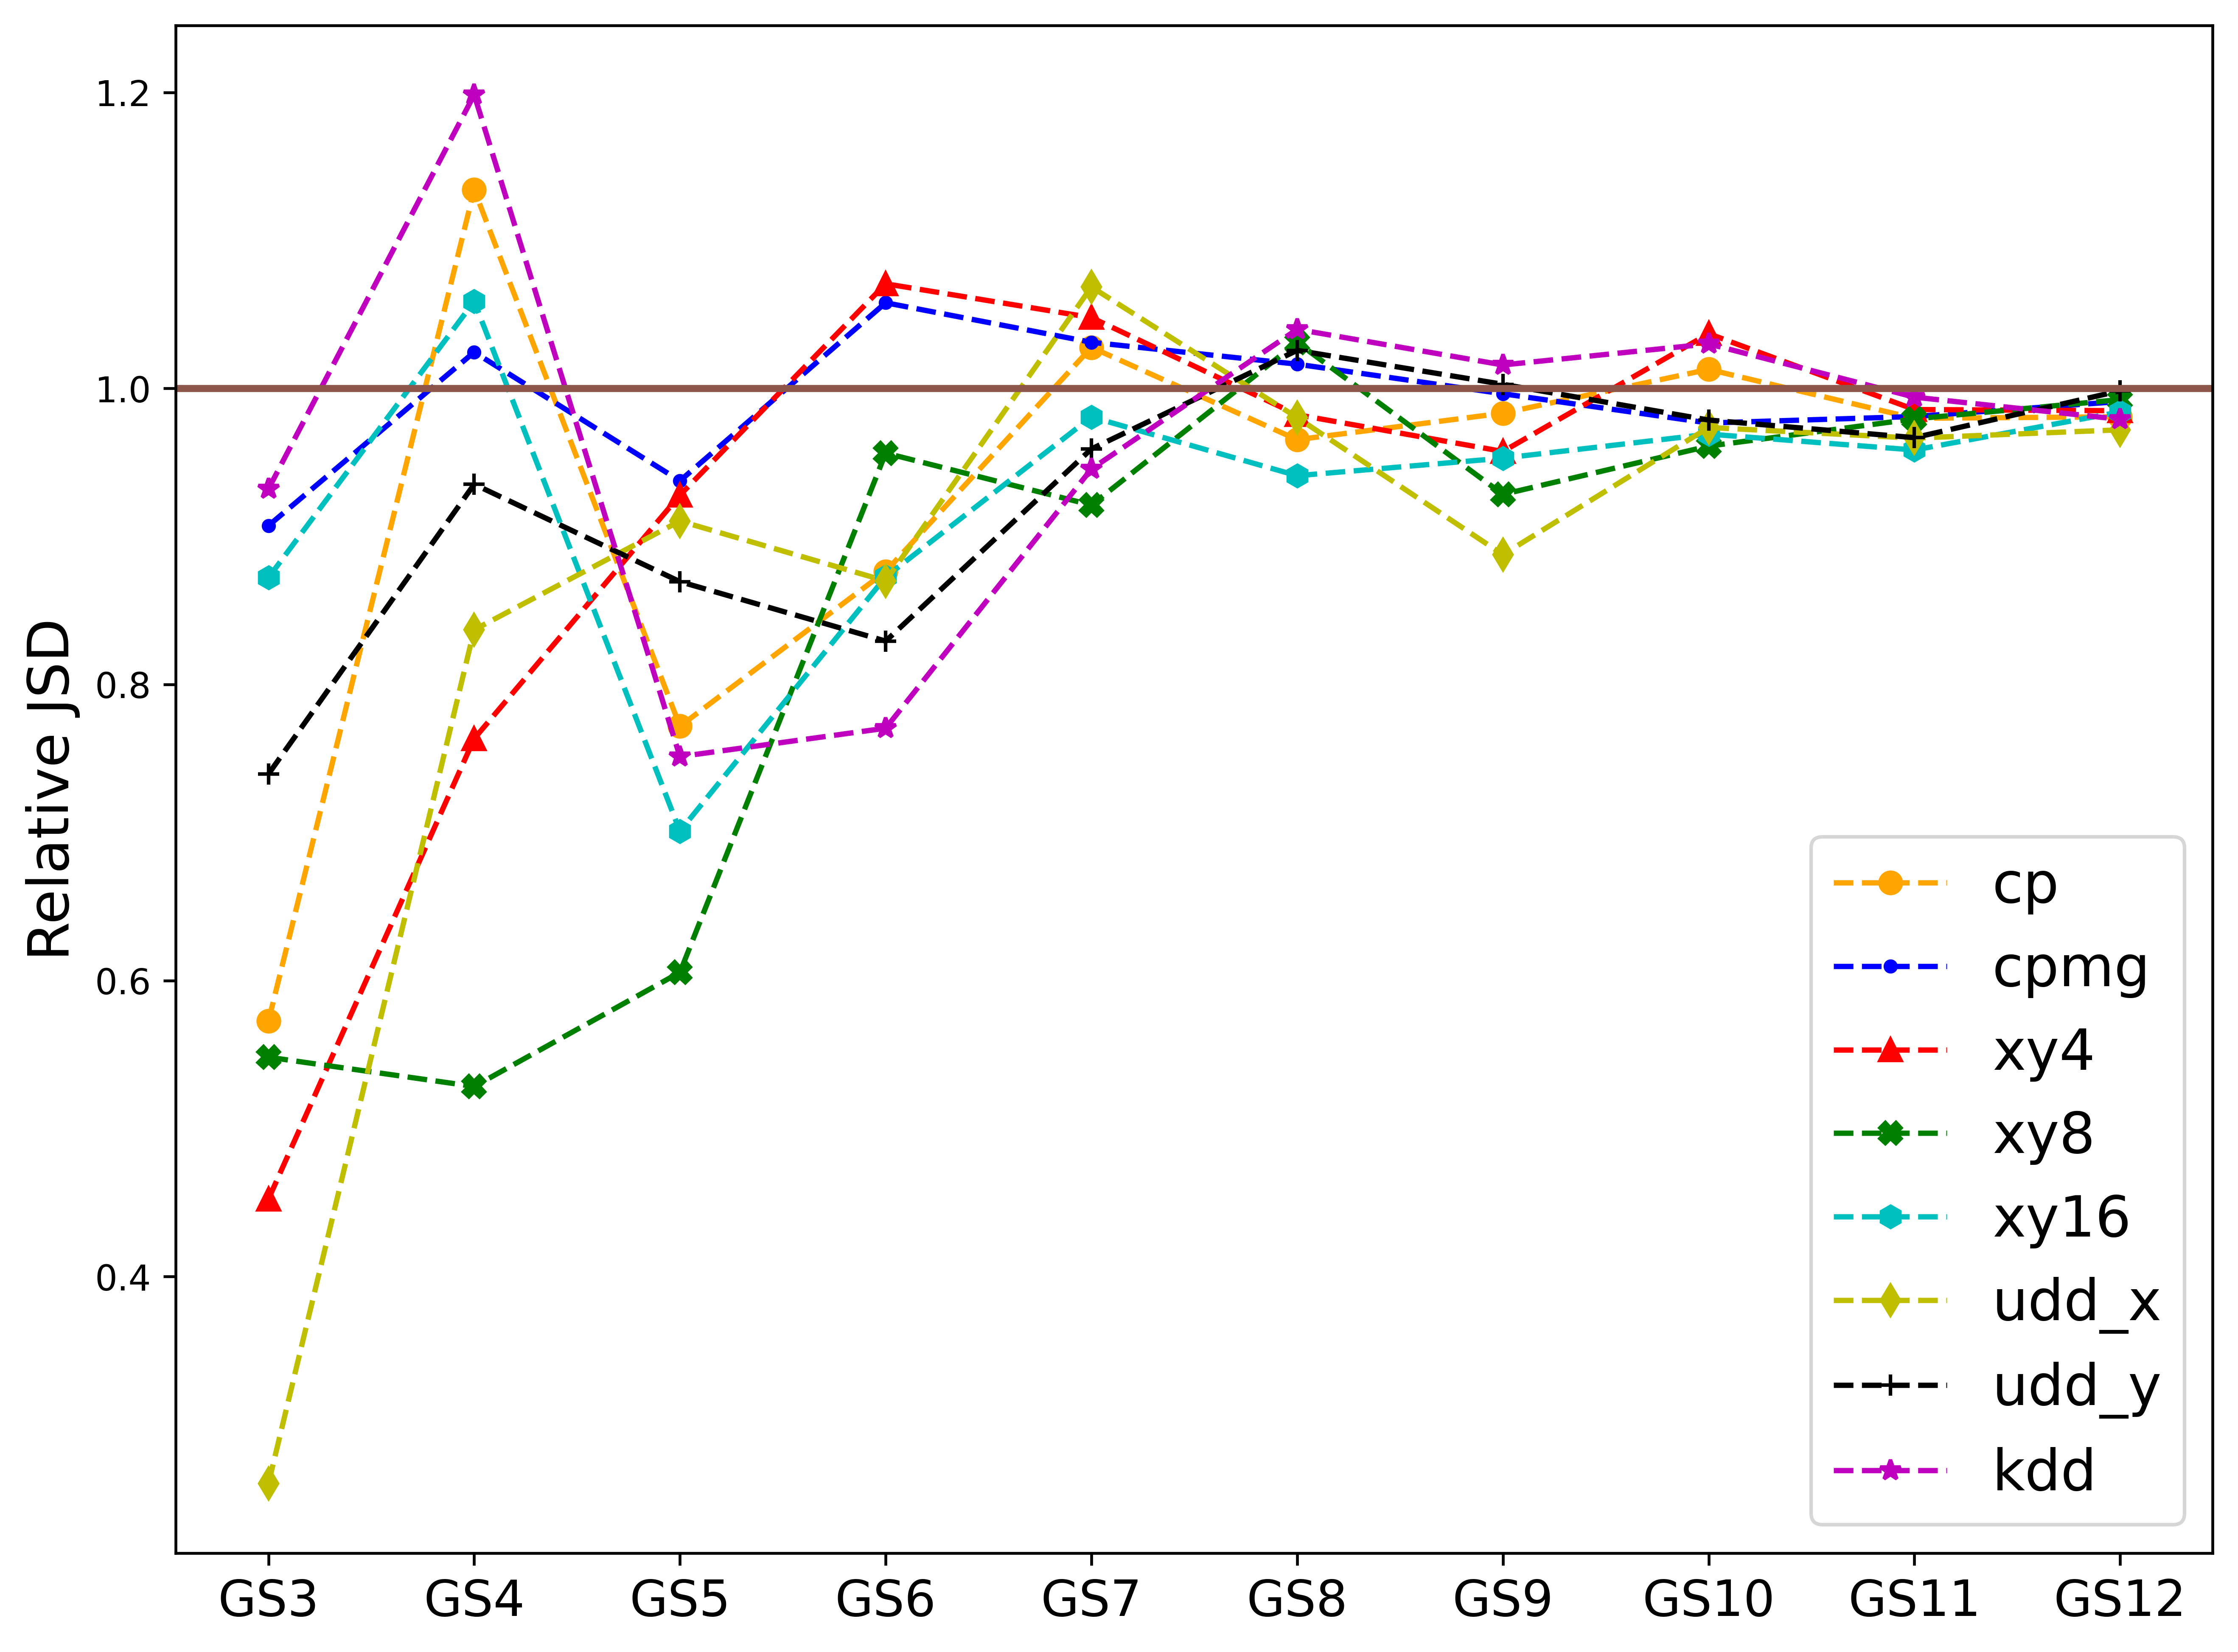

In [11]:
baseline = []

data = []
for name in circuit_names:
    result_data = gs_results_data[name]
    baseline.append(result_data[0])
    ratio = [result_data[0]/i for i in result_data[1:]]
    data.append(ratio)


data = np.array(data)

# hahn_X = data[:, 0]
# hahn_Y = data[:, 1]
cp = data[:, 2]
cpmg = data[:, 3]
xy4 = data[:, 4]
xy8 = data[:, 5]
xy16 = data[:, 6]
udd_X = data[:, 7]
udd_Y = data[:, 8]
kdd = data[:, 9]

x_ticks = circuit_names[:-2]
X = np.arange(len(x_ticks))

from matplotlib.pyplot import figure
fig = figure(num=None, figsize=(8, 6), dpi=600, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

# plt.plot(X, hahn_Y, linestyle='--', marker='o', color='g', label='hahn_X')
# plt.plot(X, hahn_X, linestyle='--', marker='s', color='m', label='hahn_Y')
plt.plot(X, cp[:-2], linestyle='--', marker='o', color='orange', label='cp')
plt.plot(X, cpmg[:-2], linestyle='--', marker='.', color='b', label='cpmg')
plt.plot(X, xy4[:-2], linestyle='--', marker='^', color='r', label='xy4')
plt.plot(X, xy8[:-2], linestyle='--', marker='X', color='g', label='xy8')
plt.plot(X, xy16[:-2], linestyle='--', marker='h', color='c', label='xy16')
plt.plot(X, udd_X[:-2], linestyle='--', marker='d', color='y', label='udd_x')
plt.plot(X, udd_Y[:-2], linestyle='--', marker='+', color='k', label='udd_y')
plt.plot(X, kdd[:-2], linestyle='--', marker='*', color='m', label='kdd')
plt.axhline(1, color='tab:brown', lw=2)
plt.legend(loc='best', fontsize=16)
# ax.set_title('Relative JSD result for GS circuit on ibmq_guadalupe', fontsize=18)
ax.set_xticks(X)
ax.set_xticklabels(x_ticks, fontsize=14)
ax.set_ylabel('Relative JSD', fontsize=16)

plt.savefig('TQE_Relat_JSD_GS_toronto_0530.pdf', bbox_inches='tight', pad_inches=0)

In [12]:
qft_job_ids = []
qft_jobs = []

for circuit in qft_circuits:
    circuit_list = []
    transpiled_qc = transpile(circuit, backend=backend, optimization_level=3, seed_transpiler=1)
    circuit_list.append(transpiled_qc)
    for pm in pms:
        qc_transpile = pm.run(transpiled_qc)
        qc_transpile_base = translate_circuit_to_basis(qc_transpile, bconf)
        circuit_list.append(qc_transpile_base)
    job = backend.run(circuit_list, shots=8192)
    qft_jobs.append(job)
    job_id = job.job_id()
    print(job_id)
    qft_job_ids.append(job_id)

if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d7374bb975a1a1efb4d4
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d73a1ea57f7dbfebd62a
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d73d32e176113693c9e9
if applied DD for None: False
if applied DD for N

In [13]:
for job_id in qft_job_ids:
    print(job_id)

6295d7374bb975a1a1efb4d4
6295d73a1ea57f7dbfebd62a
6295d73d32e176113693c9e9
6295d7404bb97546c0efb4d5
6295d7450212ff8e08251f24
6295d74b9baeab0cec4acd7f
6295d75132e1763ac293c9ea
6295d7580212ff6c9d251f25
6295d75e4ad655ff7e9e4aaf
6295d7699baeabd5a44acd80
6295d77532e17612e593c9eb
6295d7814bb9756eb2efb4d7


In [12]:
from scipy.spatial.distance import jensenshannon
qft_jsds = []

qft_job_ids = [
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    ''
]

shots = 8192

for i, circuit in enumerate(qft_circuits):
    ideal_counts = execute(circuit, backend=Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts()
    result_counts = backend.retrieve_job(qft_job_ids[i]).result().get_counts()
    jsd = []
    for result_count in result_counts:
        p_ideal, p_result = convert_count_to_prob(result_count, ideal_counts, shots=shots)
        jsd.append(jensenshannon(p_ideal, p_result))
    qft_jsds.append(jsd)

circuit_names = ['QFT3', 'QFT4', 'QFT5', 'QFT6', 'QFT7', 'QFT8', 'QFT9', 'QFT10', 'QFT11', 'QFT12', 'QFT13', 'QFT14']
DD_sequences = ['no_dd', 'hahn_X', 'hahn_Y', 'CP', 'CPMG', 'xy4', 'xy8', 'xy16', 'udd1', 'udd2', 'kdd']

qft_results_data = {}

for i, name in enumerate(circuit_names):
    print(f'---------Result of circuit {name} -------------')
    for j, jsd in enumerate(qft_jsds[i]):
        print(f'jsd result of {DD_sequences[j]}: {jsd}')
    qft_results_data[name] = qft_jsds[i]

---------Result of circuit QFT3 -------------
jsd result of no_dd: 0.1419895718883012
jsd result of hahn_X: 0.14472627617109507
jsd result of hahn_Y: 0.1460902541881784
jsd result of CP: 0.11028356834114134
jsd result of CPMG: 0.13589458628686382
jsd result of xy4: 0.09298191484755937
jsd result of xy8: 0.036554616535019305
jsd result of xy16: 0.10669889204723072
jsd result of udd1: 0.05547808679090999
jsd result of udd2: 0.09338132905689417
jsd result of kdd: 0.060932481387788506
---------Result of circuit QFT4 -------------
jsd result of no_dd: 0.07623075410291069
jsd result of hahn_X: 0.07009960047871952
jsd result of hahn_Y: 0.07263647779422426
jsd result of CP: 0.05815204268033407
jsd result of CPMG: 0.09748811775287858
jsd result of xy4: 0.08951358745456231
jsd result of xy8: 0.07094253582955709
jsd result of xy16: 0.06957915202317376
jsd result of udd1: 0.07742695148023374
jsd result of udd2: 0.027944698502952628
jsd result of kdd: 0.05594938495073494
---------Result of circuit 

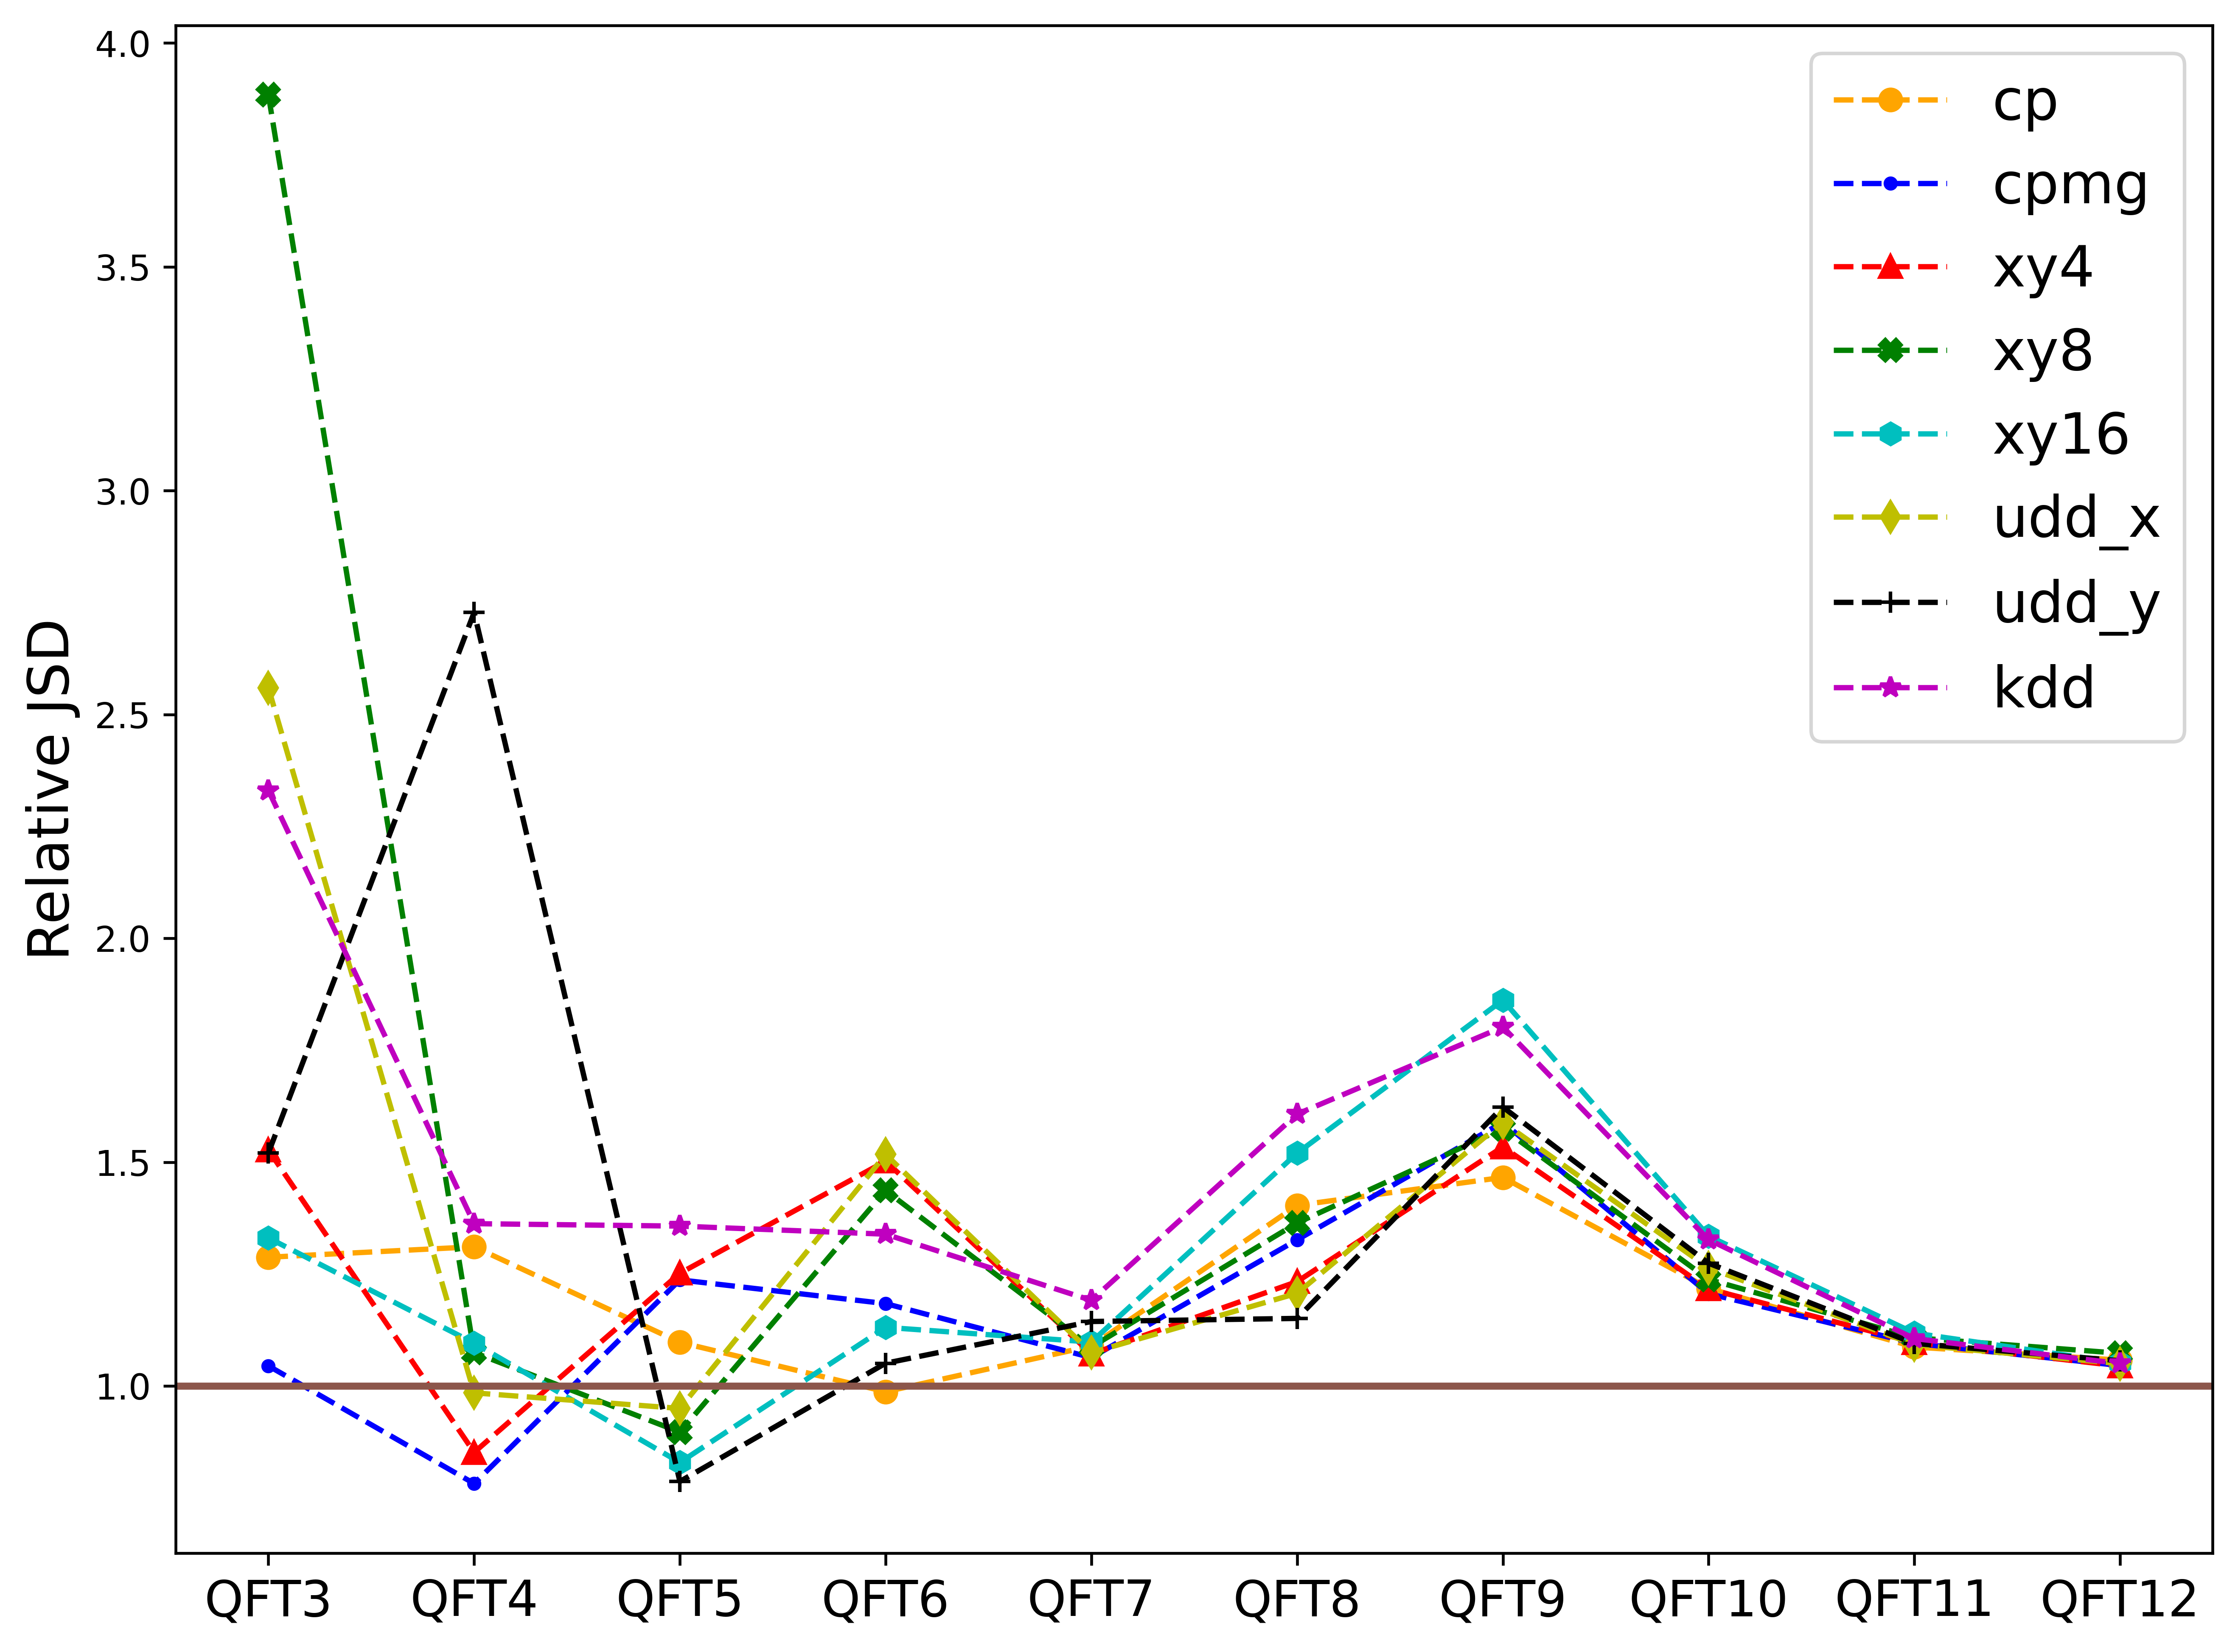

In [13]:
import matplotlib.pyplot as plt
baseline = []

data = []
for name in circuit_names:
    result_data = qft_results_data[name]
    baseline.append(result_data[0])
    ratio = [result_data[0]/i for i in result_data[1:]]
    data.append(ratio)


data = np.array(data)

# hahn_X = data[:, 0]
# hahn_Y = data[:, 1]
cp = data[:, 2]
cpmg = data[:, 3]
xy4 = data[:, 4]
xy8 = data[:, 5]
xy16 = data[:, 6]
udd_X = data[:, 7]
udd_Y = data[:, 8]
kdd = data[:, 9]

x_ticks = circuit_names[:-2]
X = np.arange(len(x_ticks))

from matplotlib.pyplot import figure
fig = figure(num=None, figsize=(8, 6), dpi=600, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

# plt.plot(X, hahn_Y, linestyle='--', marker='o', color='g', label='hahn_X')
# plt.plot(X, hahn_X, linestyle='--', marker='s', color='m', label='hahn_Y')
plt.plot(X, cp[:-2], linestyle='--', marker='o', color='orange', label='cp')
plt.plot(X, cpmg[:-2], linestyle='--', marker='.', color='b', label='cpmg')
plt.plot(X, xy4[:-2], linestyle='--', marker='^', color='r', label='xy4')
plt.plot(X, xy8[:-2], linestyle='--', marker='X', color='g', label='xy8')
plt.plot(X, xy16[:-2], linestyle='--', marker='h', color='c', label='xy16')
plt.plot(X, udd_X[:-2], linestyle='--', marker='d', color='y', label='udd_x')
plt.plot(X, udd_Y[:-2], linestyle='--', marker='+', color='k', label='udd_y')
plt.plot(X, kdd[:-2], linestyle='--', marker='*', color='m', label='kdd')
plt.axhline(1, color='tab:brown', lw=2)
plt.legend(loc='best', fontsize=16)
# ax.set_title('Relative JSD result for QFT circuit on ibmq_guadalupe', fontsize=18)
ax.set_xticks(X)
ax.set_xticklabels(x_ticks, fontsize=14)
ax.set_ylabel('Relative JSD', fontsize=16)

plt.savefig('TQE_Relat_JSD_QFT_toronto_0530.pdf', bbox_inches='tight', pad_inches=0)